# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Can XGBoost extrapolate?

<br></font>
</div>

# Can it? Can tree-based model do it?

<div class="alert alert-block alert-info">
<font color=black><br>

- It cannot extrapolate something trickier than a simple constant. 
- No linear, quadratic, or cubic interpolation is possible. 
- This means that XGBoost can only make a good prediction for situations previously encountered in the training history. It won’t capture trends!

<br></font>
</div>

# Import modules

In [1]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = 15, 5
rcParams['font.size'] = 20

[15:56:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


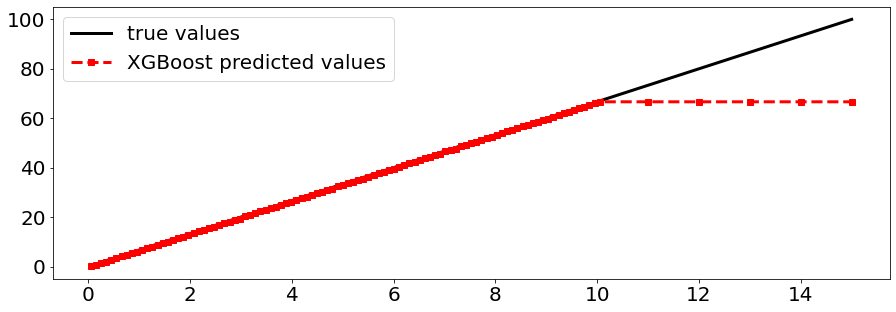

In [2]:
# Create an XGBoost model
model = XGBRegressor(n_estimators=250)

# Create time serie timestamp indices
ts = np.linspace(0, 10, 100)
X = pd.DataFrame({'ts': ts})

# Generate signal to predict using a simple linear system
y = ts * 6.66

# Train XGBoost model
model.fit(X, y)

# Create prediction inputs. Start with timestamp indices
# Shift the initial time range by 0.05 to force interpolation and augment if to force extrapolation
x_preds = pd.DataFrame({'ts': list(ts + 0.05) + [11, 12, 13, 14, 15]})
preds = model.predict(x_preds)
# Plot results. 
# XGBoost cannot extrapolate, and keep using the same value for prediction in the future
plt.plot(x_preds, x_preds['ts'] * 6.66, "k-", lw = 3, label='true values')
plt.plot(x_preds, preds, "rs--", lw = 3, label='XGBoost predicted values')
plt.legend()
plt.show()

# Can we do something about it?

<div class="alert alert-block alert-info">
<font color=black><br>

- This is a question often asked for time series.
    - If the TM is **stationary** there are ways of using XGBoost 
    - If the TM is **NOT stationary** you can try but the model would not be great.
<br><br>
- Some options we have are:
    - Augment XGBoost with a side model in charge of this.
    - Another one could be to normalize data to remove non-stationary effects and fall back to the stationary case.

<br></font>
</div>

# References

<div class="alert alert-block alert-warning">
<font color=black><br>

- https://towardsdatascience.com/xgboost-for-time-series-youre-gonna-need-a-bigger-boat-9d329efa6814

<br></font>
</div>